![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

# Clinical Named Entity Recognition (NER)

##  1. NER Model Implementation in Spark NLP

  The deep neural network architecture for NER model in
Spark NLP is BiLSTM-CNN-Char framework. a slightly modified version of the architecture proposed by Jason PC Chiu and Eric Nichols ([Named Entity Recognition with Bidirectional LSTM-CNNs
](https://arxiv.org/abs/1511.08308)). It is a neural network architecture that
automatically detects word and character-level features using a
hybrid bidirectional LSTM and CNN architecture, eliminating
the need for most feature engineering steps.

  In the original framework, the CNN extracts a fixed length
feature vector from character-level features. For each word,
these vectors are concatenated and fed to the BLSTM network
and then to the output layers. They employed a stacked
bi-directional recurrent neural network with long short-term
memory units to transform word features into named entity
tag scores. The extracted features of each word are fed into a
forward LSTM network and a backward LSTM network. The
output of each network at each time step is decoded by a linear
layer and a log-softmax layer into log-probabilities for each tag
category. These two vectors are then simply added together to
produce the final output. In the architecture of the proposed framework in the original paper, 50-dimensional pretrained word
embeddings is used for word features, 25-dimension character
embeddings is used for char features, and capitalization features
(allCaps, upperInitial, lowercase, mixedCaps, noinfo) are used
for case features.

## Blogposts and videos:

- [How to Setup Spark NLP for HEALTHCARE on UBUNTU - Video](https://www.youtube.com/watch?v=yKnF-_oz0GE)

- [Named Entity Recognition (NER) with BERT in Spark NLP](https://towardsdatascience.com/named-entity-recognition-ner-with-bert-in-spark-nlp-874df20d1d77)

- [State of the art Clinical Named Entity Recognition in Spark NLP - Youtube](https://www.youtube.com/watch?v=YM-e4eOiQ34)

- [Named Entity Recognition for Healthcare with SparkNLP NerDL and NerCRF](https://medium.com/spark-nlp/named-entity-recognition-for-healthcare-with-sparknlp-nerdl-and-nercrf-a7751b6ad571)

- [Named Entity Recognition for Clinical Text](https://medium.com/atlas-research/ner-for-clinical-text-7c73caddd180)

## Setup

In [ ]:
import json
import os

import sparknlp
import sparknlp_jsl

from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp_jsl.annotator import *

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml import Pipeline,PipelineModel

import warnings
warnings.filterwarnings('ignore')

params = {"spark.driver.memory":"16G", 
          "spark.kryoserializer.buffer.max":"2000M", 
          "spark.driver.maxResultSize":"2000M"} 

print("Spark NLP Version :", sparknlp.version())
print("Spark NLP_JSL Version :", sparknlp_jsl.version())

spark = sparknlp_jsl.start(secret="",params=params)

spark

## Clinical NER Pipeline (with pretrained models)

- **Clinical NER Models**

|   index | model_name                     |   index | model_name                        |   index | model_name                        |   index | model_name                 |
|--------:|:-------------------------------|--------:|:----------------------------------|--------:|:----------------------------------|--------:|:---------------------------|
|       1 | jsl_ner_wip_clinical           |       2 | ner_chexpert                      |       3 | ner_deid_subentity (German)       |       4 | ner_jsl_greedy             |
|       5 | jsl_ner_wip_greedy_clinical    |       6 | ner_clinical                      |       7 | ner_diseases_large                |       8 | ner_jsl_slim               |
|       9 | jsl_ner_wip_modifier_clinical  |      10 | ner_clinical_icdem                |      11 | ner_drugs                         |      12 | ner_measurements_clinical  |
|      13 | jsl_rd_ner_wip_greedy_clinical |      14 | ner_clinical_large                |      15 | ner_drugs_greedy                  |      16 | ner_medmentions_coarse     |
|      17 | ner_ade_clinical               |      18 | ner_clinical_large_en             |      19 | ner_drugs_large                   |      20 | ner_posology               |
|      21 | ner_ade_clinicalbert           |      22 | ner_deid_augmented                |      23 | ner_events_admission_clinical     |      24 | ner_posology_experimental  |
|      25 | ner_ade_healthcare             |      26 | ner_deid_enriched                 |      27 | ner_events_clinical               |      28 | ner_posology_greedy        |
|      29 | ner_anatomy                    |      30 | ner_deid_generic_augmented        |      31 | ner_events_healthcare             |      32 | ner_posology_healthcare    |
|      33 | ner_anatomy_coarse             |      34 | ner_deid_generic (German)         |      35 | ner_genetic_variants              |      36 | ner_posology_large         |
|      37 | ner_bacterial_species          |      38 | ner_deid_large                    |      39 | ner_healthcare                    |      40 | ner_posology_small         |
|      41 | ner_bionlp                     |      42 | ner_deid_sd                       |      43 | ner_human_phenotype_gene_clinical |      44 | ner_profiling_clinical     |
|      45 | ner_cancer_genetics            |      46 | ner_deid_sd_large                 |      47 | ner_human_phenotype_go_clinical   |      48 | ner_radiology              |
|      49 | ner_cellular                   |      50 | ner_deid_subentity_augmented      |      51 | ner_jsl                           |      52 | ner_radiology_wip_clinical |
|      53 | ner_chemicals                  |      54 | ner_deid_synthetic                |      55 | ner_jsl_enriched                  |      56 | ner_risk_factors           |
|      57 | ner_chemprot_clinical          |      58 | ner_deidentify_dl                 |      59 | ner_nihss                         |      60 | ner_biomarker              |
|      61 | ner_abbreviation_clinical      |      62 | ner_deid_subentity_augmented_i2b2 |      63 | ner_diseases                      |      64 | ner_drugprot_clinical      |
|      65 | ner_nature_nero_clinical_en    |      66 | ner_supplement_clinical_en        |    67     | ner_biomedical_bc2gm           |         |                            |




- **BioBert NER Models**

|   index | model_name                    |   index | model_name                |   index | model_name                       |   index | model_name                 |
|--------:|:------------------------------|--------:|:--------------------------|--------:|:---------------------------------|--------:|:---------------------------|
|       1 | jsl_ner_wip_greedy_biobert    |       7 | ner_cellular_biobert      |      13 | ner_events_biobert               |      18 | ner_jsl_greedy_biobert     |
|       2 | jsl_rd_ner_wip_greedy_biobert |       8 | ner_chemprot_biobert      |      14 | ner_human_phenotype_gene_biobert |      19 | ner_posology_biobert       |
|       3 | ner_ade_biobert               |       9 | ner_clinical_biobert      |      15 | ner_human_phenotype_go_biobert   |      20 | ner_posology_large_biobert |
|       4 | ner_anatomy_biobert           |      10 | ner_deid_biobert          |      16 | ner_jsl_biobert                  |      21 | ner_profiling_biobert      |
|       5 | ner_anatomy_coarse_biobert    |      11 | ner_deid_enriched_biobert |      17 | ner_jsl_enriched_biobert         |      22 | ner_risk_factors_biobert   |
|       6 | ner_bionlp_biobert            |      12 | ner_diseases_biobert      |         |                                  |         |                            |


- **BertForTokenClassification Clinical NER models**

|    | model_name                         |
|---:|:-----------------------------------|
|  1 | bert_token_classifier_ner_ade      |
|  2 | bert_token_classifier_ner_clinical |
|  3 | bert_token_classifier_ner_deid     |
|  4 | bert_token_classifier_ner_drugs    |
|  5 | bert_token_classifier_ner_jsl      |
|  6 | bert_token_classifier_ner_jsl_slim |
|  7 | bert_token_classifier_ner_bionlp   |
|  8 | bert_token_classifier_ner_bacteria |
|  9 | bert_token_classifier_ner_anatomy  |
| 10 | bert_token_classifier_ner_cellular |
| 11 | bert_token_classifier_ner_chemprot |
| 12 | bert_token_classifier_ner_chemicals|
| 13 | bert_token_classifier_drug_development_trials   |



**You can find all these models and more [NLP Models Hub](https://nlp.johnsnowlabs.com/models?task=Named+Entity+Recognition&edition=Spark+NLP+for+Healthcare)**

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
        
sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")
 
# Tokenizer splits words in a relevant format for NLP
tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical","en","clinical/models")\
    .setInputCols(["sentence","token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
clinical_ner = MedicalNerModel.pretrained("ner_clinical_large","en","clinical/models")\
    .setInputCols(["sentence","token","embeddings"])\
    .setOutputCol("ner")\
    .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case 

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        clinical_ner,
        ner_converter])


empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)


sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical_large download started this may take some time.
[OK!]


In [ ]:
model.stages

[DocumentAssembler_89cf580b76cf,
 SentenceDetectorDLModel_6bafc4746ea5,
 REGEX_TOKENIZER_2c12ff7f55c0,
 WORD_EMBEDDINGS_MODEL_9004b1d00302,
 MedicalNerModel_1a8637089929,
 NerConverter_200a4e828aef]

In [ ]:
clinical_ner.getClasses()

['O',
 'B-TREATMENT',
 'I-TREATMENT',
 'B-PROBLEM',
 'I-PROBLEM',
 'B-TEST',
 'I-TEST']

In [ ]:
clinical_ner.extractParamMap()

{Param(parent='MedicalNerModel_1a8637089929', name='batchSize', doc='Size of every batch'): 64,
 Param(parent='MedicalNerModel_1a8637089929', name='classes', doc='get the tags used to trained this MedicalNerModel'): ['O',
  'B-TREATMENT',
  'I-TREATMENT',
  'B-PROBLEM',
  'I-PROBLEM',
  'B-TEST',
  'I-TEST'],
 Param(parent='MedicalNerModel_1a8637089929', name='includeAllConfidenceScores', doc='whether to include all confidence scores in annotation metadata or just the score of the predicted tag'): False,
 Param(parent='MedicalNerModel_1a8637089929', name='includeConfidence', doc='whether to include confidence scores in annotation metadata'): True,
 Param(parent='MedicalNerModel_1a8637089929', name='inferenceBatchSize', doc='number of sentences to process in a single batch during inference'): 1,
 Param(parent='MedicalNerModel_1a8637089929', name='inputCols', doc='previous annotations columns, if renamed'): ['sentence',
  'token',
  'embeddings'],
 Param(parent='MedicalNerModel_1a8637089

In [ ]:
clinical_ner.getStorageRef()

'clinical'

In [ ]:
from sparknlp_jsl.compatibility import Compatibility 
import pandas as pd

compatibility = Compatibility(spark)

models = compatibility.findVersion('ner') 

models_df = pd.DataFrame([dict(x) for x in list(models)])
models_df

name sparkVersion version language  \
0            nerdl_tumour_demo            2   1.7.3       en   
1           nercrf_tumour_demo            2   1.7.3       en   
2            nerdl_tumour_demo          2.4   1.8.0       en   
3           nercrf_tumour_demo          2.4   1.8.0       en   
4                  nercrf_deid          2.4   1.8.0       en   
..                         ...          ...     ...      ...   
455  ner_ade_clinical_pipeline          3.0   3.4.1       en   
456         ner_deid_subentity          3.0   3.4.2       pt   
457           ner_deid_generic          3.0   3.4.2       pt   
458       ner_biomedical_bc2gm          3.0   3.5.1       en   
459       ner_biomedical_bc2gm          2.4   3.5.1       en   

                        date readyToUse  
0    2018-12-19T16:52:37.735       true  
1    2018-12-19T17:23:53.776       true  
2    2018-12-22T04:21:25.574       true  
3    2018-12-22T04:46:26.992       true  
4    2018-12-23T00:44:17.698       true  
..                       ...        ...  
455  2022-03-21T14:55:30.624       true  
456  2022-04-13T09:04:03.338       true  
457  2022-04-13T10:49:17.944       true  
458  2022-05-10T12:00:14.650       true  
459  2022-05-11T09:40:09.994       true  

[460 rows x 6 columns]

In [ ]:
# Downloading sample datasets.
! wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/mt_samples.csv

In [ ]:
import pandas as pd

# mt_samples_df = spark.read.csv("mt_samples.csv", header=True)

mt_samples_df = spark.createDataFrame(pd.read_csv("./mt_samples.csv").reset_index())

In [ ]:
mt_samples_df.printSchema()

root
 |-- index: long (nullable = true)
 |-- text: string (nullable = true)



In [ ]:
mt_samples_df.show()

+-----+--------------------+
|index|                text|
+-----+--------------------+
|    0|Sample Type / Med...|
|    1|Sample Type / Med...|
|    2|Sample Type / Med...|
|    3|Sample Type / Med...|
|    4|Sample Type / Med...|
|    5|Sample Type / Med...|
|    6|Sample Type / Med...|
|    7|Sample Type / Med...|
|    8|Sample Type / Med...|
|    9|Sample Type / Med...|
|   10|Sample Type / Med...|
|   11|Sample Type / Med...|
|   12|Sample Type / Med...|
|   13|Sample Type / Med...|
|   14|Sample Type / Med...|
|   15|Sample Type / Med...|
|   16|Sample Type / Med...|
|   17|Sample Type / Med...|
|   18|Sample Type / Med...|
|   19|Sample Type / Med...|
+-----+--------------------+
only showing top 20 rows



In [ ]:
print(mt_samples_df.limit(1).collect()[0]['text'])

Sample Type / Medical Specialty:
Hematology - Oncology
Sample Name:
Discharge Summary - Mesothelioma - 1
Description:
Mesothelioma, pleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.
(Medical Transcription Sample Report)
PRINCIPAL DIAGNOSIS:
Mesothelioma.
SECONDARY DIAGNOSES:
Pleural effusion, atrial fibrillation, anemia, ascites, esophageal reflux, and history of deep venous thrombosis.
PROCEDURES
1. On August 24, 2007, decortication of the lung with pleural biopsy and transpleural fluoroscopy.
2. On August 20, 2007, thoracentesis.
3. On August 31, 2007, Port-A-Cath placement.
HISTORY AND PHYSICAL:
The patient is a 41-year-old Vietnamese female with a nonproductive cough that started last week. She has had right-sided chest pain radiating to her back with fever starting yesterday. She has a history of pericarditis and pericardectomy in May 2006 and developed cough with right-sided chest pain, and went to an urgent care cen

In [ ]:
result = model.transform(mt_samples_df.limit(100)).cache()

In [ ]:
result.show()

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 118, 129...|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 68, 92, ...|
|    2|Sample Type / Med...|[{document, 0, 42...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 68, 73, ...|
|    3|Sample Type / Med...|[{document, 0, 20...|[{document, 0, 53...|

In [ ]:
result.select('token.result','ner.result').show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, Discharge, Sum...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-PROBLEM, O, B-PROBLEM, I-PROBLEM, ...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, BCCa, Excision...|[O, O, O, O, O, O, O, O, O, O, O, O, B-TREATMENT, I-TREATMENT, I-TREATMENT, I-TREA

In [ ]:
result_df = result.select(F.explode(F.arrays_zip(result.token.result,
                                                 result.ner.result)).alias("cols"))\
                  .select(F.expr("cols['0']").alias("token"),
                          F.expr("cols['1']").alias("ner_label"))

result_df.show(50, truncate=100)

+-------------+---------+
|        token|ner_label|
+-------------+---------+
|       Sample|        O|
|         Type|        O|
|            /|        O|
|      Medical|        O|
|    Specialty|        O|
|            :|        O|
|   Hematology|        O|
|            -|        O|
|     Oncology|        O|
|       Sample|        O|
|         Name|        O|
|            :|        O|
|    Discharge|        O|
|      Summary|        O|
|            -|        O|
| Mesothelioma|        O|
|            -|        O|
|            1|        O|
|  Description|        O|
|            :|        O|
| Mesothelioma|B-PROBLEM|
|            ,|        O|
|      pleural|B-PROBLEM|
|     effusion|I-PROBLEM|
|            ,|        O|
|       atrial|B-PROBLEM|
| fibrillation|I-PROBLEM|
|            ,|        O|
|       anemia|B-PROBLEM|
|            ,|        O|
|      ascites|B-PROBLEM|
|            ,|        O|
|   esophageal|B-PROBLEM|
|       reflux|I-PROBLEM|
|            ,|        O|
|          a

In [ ]:
result_df.select("token", "ner_label")\
         .groupBy('ner_label').count()\
         .orderBy('count', ascending=False)\
         .show(truncate=False)

+-----------+-----+
|ner_label  |count|
+-----------+-----+
|O          |25751|
|I-PROBLEM  |3139 |
|B-PROBLEM  |2141 |
|I-TREATMENT|1301 |
|B-TREATMENT|1254 |
|I-TEST     |918  |
|B-TEST     |792  |
+-----------+-----+



In [ ]:
result.select('ner_chunk').take(1)

[Row(ner_chunk=[Row(annotatorType='chunk', begin=118, end=129, result='Mesothelioma', metadata={'sentence': '2', 'chunk': '0', 'entity': 'PROBLEM', 'confidence': '0.9991'}, embeddings=[]), Row(annotatorType='chunk', begin=132, end=147, result='pleural effusion', metadata={'sentence': '2', 'chunk': '1', 'entity': 'PROBLEM', 'confidence': '0.99469995'}, embeddings=[]), Row(annotatorType='chunk', begin=150, end=168, result='atrial fibrillation', metadata={'sentence': '2', 'chunk': '2', 'entity': 'PROBLEM', 'confidence': '0.99785'}, embeddings=[]), Row(annotatorType='chunk', begin=171, end=176, result='anemia', metadata={'sentence': '2', 'chunk': '3', 'entity': 'PROBLEM', 'confidence': '0.999'}, embeddings=[]), Row(annotatorType='chunk', begin=179, end=185, result='ascites', metadata={'sentence': '2', 'chunk': '4', 'entity': 'PROBLEM', 'confidence': '0.9996'}, embeddings=[]), Row(annotatorType='chunk', begin=188, end=204, result='esophageal reflux', metadata={'sentence': '2', 'chunk': '5',

In [ ]:
result.select(F.explode(F.arrays_zip(result.ner_chunk.result, 
                                     result.ner_chunk.metadata)).alias("cols")) \
      .select(F.expr("cols['0']").alias("chunk"),
              F.expr("cols['1']['entity']").alias("ner_label")).show(truncate=False)

+-------------------------+---------+
|chunk                    |ner_label|
+-------------------------+---------+
|Mesothelioma             |PROBLEM  |
|pleural effusion         |PROBLEM  |
|atrial fibrillation      |PROBLEM  |
|anemia                   |PROBLEM  |
|ascites                  |PROBLEM  |
|esophageal reflux        |PROBLEM  |
|deep venous thrombosis   |PROBLEM  |
|Mesothelioma             |PROBLEM  |
|Pleural effusion         |PROBLEM  |
|atrial fibrillation      |PROBLEM  |
|anemia                   |PROBLEM  |
|ascites                  |PROBLEM  |
|esophageal reflux        |PROBLEM  |
|deep venous thrombosis   |PROBLEM  |
|decortication of the lung|TREATMENT|
|pleural biopsy           |TEST     |
|transpleural fluoroscopy |TEST     |
|thoracentesis            |TREATMENT|
|Port-A-Cath placement    |TREATMENT|
|a nonproductive cough    |PROBLEM  |
+-------------------------+---------+
only showing top 20 rows



### with LightPipelines

In [ ]:
# fullAnnotate in LightPipeline

text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 
'''

print (text)

light_model = LightPipeline(model)

light_result = light_model.fullAnnotate(text)


chunks = []
entities = []
sentence= []
begin = []
end = []

for n in light_result[0]['ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence'])
    
    
import pandas as pd

df_clinical = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end, 
                   'sentence_id':sentence, 'entities':entities})

df_clinical.head(20)


A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 



chunks  begin  end sentence_id   entities
0           gestational diabetes mellitus     40   68           0    PROBLEM
1   subsequent type two diabetes mellitus    118  154           0    PROBLEM
2                                    T2DM    158  161           0    PROBLEM
3                HTG-induced pancreatitis    187  210           0    PROBLEM
4                      an acute hepatitis    268  285           0    PROBLEM
5                                polyuria    326  333           0    PROBLEM
6                           poor appetite    337  349           0    PROBLEM
7                                vomiting    357  364           0    PROBLEM
8                               metformin    380  388           1  TREATMENT
9                               glipizide    392  400           1  TREATMENT
10                          dapagliflozin    408  420           1  TREATMENT
11                                   T2DM    426  429           1    PROBLEM
12                           atorvastatin    435  446           1  TREATMENT
13                            gemfibrozil    452  462           1  TREATMENT
14                                    HTG    468  470           1    PROBLEM
15                          dapagliflozin    490  502           2  TREATMENT
16                   Physical examination    550  569           3       TEST
17                        dry oral mucosa    607  621           3    PROBLEM
18              her abdominal examination    641  665           3       TEST
19                             tenderness    686  695           3    PROBLEM

In [ ]:
light_result[0]

{'document': [Annotation(document, 0, 901, 
  A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
  She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
  Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 
  , {})],
 'embeddings': [Annotation(word_embeddi

### NER Visualizer

For saving the visualization result, provide `save_path` parameter in the display function.

In [ ]:
from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_result.html")

# Change color of an entity label

#visualiser.set_label_colors({'PROBLEM':'#008080', 'TEST':'#800080', 'TREATMENT':'#808080'})
#visualiser.display(light_result[0], label_col='ner_chunk')

# Set label filter

# visualiser.display(light_result[0], label_col='ner_chunk', document_col='document',
                   #labels=['PROBLEM','TEST'])

## NER JSL
Let's show an example of `ner_jsl` model that has about 80 clinical entity labels by changing just only the model name.

**Entities**

| | | | | |
|-|-|-|-|-|
|Injury_or_Poisoning|Direction|Test|Admission_Discharge|Death_Entity|
|Relationship_Status|Duration|Respiration|Hyperlipidemia|Birth_Entity|
|Age|Labour_Delivery|Family_History_Header|BMI|Temperature|
|Alcohol|Kidney_Disease|Oncological|Medical_History_Header|Cerebrovascular_Disease|
|Oxygen_Therapy|O2_Saturation|Psychological_Condition|Heart_Disease|Employment|
|Obesity|Disease_Syndrome_Disorder|Pregnancy|ImagingFindings|Procedure|
|Medical_Device|Race_Ethnicity|Section_Header|Symptom|Treatment|
|Substance|Route|Drug_Ingredient|Blood_Pressure|Diet|
|External_body_part_or_region|LDL|VS_Finding|Allergen|EKG_Findings|
|Imaging_Technique|Triglycerides|RelativeTime|Gender|Pulse|
|Social_History_Header|Substance_Quantity|Diabetes|Modifier|Internal_organ_or_component|
|Clinical_Dept|Form|Drug_BrandName|Strength|Fetus_NewBorn|
|RelativeDate|Height|Test_Result|Sexually_Active_or_Sexual_Orientation|Frequency|
|Time|Weight|Vaccine|Vital_Signs_Header|Communicable_Disease|
|Dosage|Overweight|Hypertension|HDL|Total_Cholesterol|
|Smoking|Date||||

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models") \
    .setInputCols(["document"]) \
    .setOutputCol("sentence") 

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

jsl_ner = MedicalNerModel.pretrained("ner_jsl", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("jsl_ner")

jsl_ner_converter = NerConverter() \
    .setInputCols(["sentence", "token", "jsl_ner"]) \
    .setOutputCol("jsl_ner_chunk")

jsl_ner_pipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

jsl_ner_model = jsl_ner_pipeline.fit(empty_data)

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_jsl download started this may take some time.
[OK!]


In [ ]:
print (text)

jsl_light_model = LightPipeline(jsl_ner_model)

jsl_light_result = jsl_light_model.fullAnnotate(text)


chunks = []
entities = []
sentence= []
begin = []
end = []

for n in jsl_light_result[0]['jsl_ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence'])
    
    
import pandas as pd

jsl_df = pd.DataFrame({'chunks':chunks, 'begin': begin, 'end':end, 
                   'sentence_id':sentence, 'entities':entities})

jsl_df.head(20)


A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 



chunks  begin  end sentence_id  \
0                     28-year-old      3   13           0   
1                          female     15   20           0   
2   gestational diabetes mellitus     40   68           0   
3               eight years prior     80   96           0   
4                      subsequent    118  127           0   
5      type two diabetes mellitus    129  154           0   
6                            T2DM    158  161           0   
7        HTG-induced pancreatitis    187  210           0   
8               three years prior    212  228           0   
9                           acute    271  275           0   
10                      hepatitis    277  285           0   
11                       one-week    306  313           0   
12                       polyuria    326  333           0   
13                  poor appetite    337  349           0   
14                       vomiting    357  364           0   
15                            She    369  371           1   
16                      metformin    380  388           1   
17                      glipizide    392  400           1   
18                  dapagliflozin    408  420           1   
19                           T2DM    426  429           1   

                     entities  
0                         Age  
1                      Gender  
2                    Diabetes  
3                RelativeDate  
4                    Modifier  
5                    Diabetes  
6                    Diabetes  
7   Disease_Syndrome_Disorder  
8                RelativeDate  
9                    Modifier  
10  Disease_Syndrome_Disorder  
11                   Duration  
12                    Symptom  
13                    Symptom  
14                    Symptom  
15                     Gender  
16            Drug_Ingredient  
17            Drug_Ingredient  
18            Drug_Ingredient  
19            Drug_Ingredient

### Checking `ner_clinical_large` and `ner_jsl` results together



In [ ]:
from google.colab import widgets

t = widgets.TabBar(["ner_clinical_large", "ner_jsl", "viz_clinical", "viz_jsl"])

with t.output_to(0):
    display(df_clinical)

with t.output_to(1):
    display(jsl_df)

with t.output_to(2):
    visualiser.display(light_result[0], label_col='ner_chunk', document_col='document')

with t.output_to(3):
    visualiser.display(jsl_light_result[0], label_col='jsl_ner_chunk', document_col='document')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin  end sentence_id   entities
0           gestational diabetes mellitus     40   68           0    PROBLEM
1   subsequent type two diabetes mellitus    118  154           0    PROBLEM
2                                    T2DM    158  161           0    PROBLEM
3                HTG-induced pancreatitis    187  210           0    PROBLEM
4                      an acute hepatitis    268  285           0    PROBLEM
5                                polyuria    326  333           0    PROBLEM
6                           poor appetite    337  349           0    PROBLEM
7                                vomiting    357  364           0    PROBLEM
8                               metformin    380  388           1  TREATMENT
9                               glipizide    392  400           1  TREATMENT
10                          dapagliflozin    408  420           1  TREATMENT
11                                   T2DM    426  429           1    PROBLEM
12                           atorvastatin    435  446           1  TREATMENT
13                            gemfibrozil    452  462           1  TREATMENT
14                                    HTG    468  470           1    PROBLEM
15                          dapagliflozin    490  502           2  TREATMENT
16                   Physical examination    550  569           3       TEST
17                        dry oral mucosa    607  621           3    PROBLEM
18              her abdominal examination    641  665           3       TEST
19                             tenderness    686  695           3    PROBLEM
20                               guarding    699  706           3    PROBLEM
21                               rigidity    713  720           3    PROBLEM
22                          serum glucose    774  786           4       TEST
23                             creatinine    801  810           4       TEST
24                          triglycerides    824  836           4       TEST
25                      total cholesterol    850  866           4       TEST
26                              venous pH    884  892           4       TEST

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks  begin  end sentence_id  \
0                     28-year-old      3   13           0   
1                          female     15   20           0   
2   gestational diabetes mellitus     40   68           0   
3               eight years prior     80   96           0   
4                      subsequent    118  127           0   
5      type two diabetes mellitus    129  154           0   
6                            T2DM    158  161           0   
7        HTG-induced pancreatitis    187  210           0   
8               three years prior    212  228           0   
9                           acute    271  275           0   
10                      hepatitis    277  285           0   
11                       one-week    306  313           0   
12                       polyuria    326  333           0   
13                  poor appetite    337  349           0   
14                       vomiting    357  364           0   
15                            She    369  371           1   
16                      metformin    380  388           1   
17                      glipizide    392  400           1   
18                  dapagliflozin    408  420           1   
19                           T2DM    426  429           1   
20                   atorvastatin    435  446           1   
21                    gemfibrozil    452  462           1   
22                            HTG    468  470           1   
23                            She    474  476           2   
24                  dapagliflozin    490  502           2   
25                 for six months    504  517           2   
26                dry oral mucosa    607  621           3   
27                            her    641  643           3   
28                      abdominal    645  653           3   
29                     tenderness    686  695           3   
30                       guarding    699  706           3   
31                       rigidity    713  720           3   
32                      admission    757  765           4   
33                  serum glucose    774  786           4   
34                      111 mg/dl    788  796           4   
35                     creatinine    801  810           4   
36                      0.4 mg/dL    812  820           4   
37        triglycerides 508 mg/dL    824  846           4   
38    total cholesterol 122 mg/dL    850  876           4   
39                      venous pH    884  892           4   
40                           7.27    894  897           4   

                        entities  
0                            Age  
1                         Gender  
2                       Diabetes  
3                   RelativeDate  
4                       Modifier  
5                       Diabetes  
6                       Diabetes  
7      Disease_Syndrome_Disorder  
8                   RelativeDate  
9                       Modifier  
10     Disease_Syndrome_Disorder  
11                      Duration  
12                       Symptom  
13                       Symptom  
14                       Symptom  
15                        Gender  
16               Drug_Ingredient  
17               Drug_Ingredient  
18               Drug_Ingredient  
19               Drug_Ingredient  
20               Drug_Ingredient  
21               Drug_Ingredient  
22               Drug_Ingredient  
23                        Gender  
24               Drug_Ingredient  
25                      Duration  
26                       Symptom  
27                        Gender  
28  External_body_part_or_region  
29                       Symptom  
30                       Symptom  
31                       Symptom  
32           Admission_Discharge  
33                          Test  
34                   Test_Result  
35                          Test  
36                   Test_Result  
37                 Triglycerides  
38             Total_Cholesterol  
39                          Test  
40                   Test_Res

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Posology NER
**Entities**

- DOSAGE
- DRUG
- DURATION
- FORM
- FREQUENCY
- ROUTE
- STRENGTH

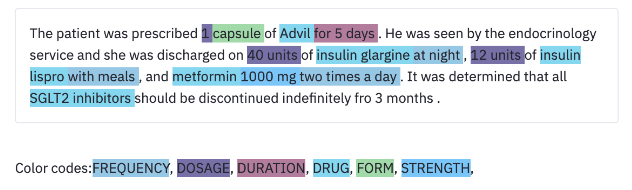

In [ ]:
# NER model trained on i2b2 (sampled from MIMIC) dataset
posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

posology_ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

# greedy model
posology_ner_greedy = MedicalNerModel.pretrained("ner_posology_greedy", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner_greedy")

ner_converter_greedy = NerConverter()\
    .setInputCols(["sentence","token","ner_greedy"])\
    .setOutputCol("ner_chunk_greedy")

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    posology_ner_converter,
    posology_ner_greedy,
    ner_converter_greedy])

empty_data = spark.createDataFrame([[""]]).toDF("text")

posology_model = nlpPipeline.fit(empty_data)


ner_posology download started this may take some time.
[OK!]
ner_posology_greedy download started this may take some time.
[OK!]


In [ ]:
posology_ner.getClasses()

['O',
 'B-DOSAGE',
 'B-STRENGTH',
 'I-STRENGTH',
 'B-ROUTE',
 'B-FREQUENCY',
 'I-FREQUENCY',
 'B-DRUG',
 'I-DRUG',
 'B-FORM',
 'I-DOSAGE',
 'B-DURATION',
 'I-DURATION',
 'I-FORM',
 'I-ROUTE']

In [ ]:
posology_result = posology_model.transform(mt_samples_df)

In [ ]:
posology_result.show(10)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|          ner_greedy|    ner_chunk_greedy|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 1609, 16...|[{named_entity, 0...|[{chunk, 1609, 16...|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 742, 750...|[{named_entity, 0...|[{chunk, 742, 753...|
|    2|Sample T

In [ ]:
posology_result.printSchema()

root
 |-- index: long (nullable = true)
 |-- text: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- sentence: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- valu

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

# This will return a new DF with all the columns + id
posology_result = posology_result.withColumn("id", monotonically_increasing_id())

posology_result.show(3)

+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|index|                text|            document|            sentence|               token|          embeddings|                 ner|           ner_chunk|          ner_greedy|    ner_chunk_greedy| id|
+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---+
|    0|Sample Type / Med...|[{document, 0, 54...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 1609, 16...|[{named_entity, 0...|[{chunk, 1609, 16...|  0|
|    1|Sample Type / Med...|[{document, 0, 32...|[{document, 0, 53...|[{token, 0, 5, Sa...|[{word_embeddings...|[{named_entity, 0...|[{chunk, 742, 750...|[{named_entity, 0...|[{chunk, 742, 753...|

In [ ]:
posology_result.select('token.result','ner.result').show(truncate=100)

+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|                                                                                              result|                                                                                              result|
+----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, Discharge, Sum...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...|
|[Sample, Type, /, Medical, Specialty, :, Hematology, -, Oncology, Sample, Name, :, BCCa, Excision...|[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, 

In [ ]:
posology_result.select('token.result','ner.result').take(2)

[Row(result=['Sample', 'Type', '/', 'Medical', 'Specialty', ':', 'Hematology', '-', 'Oncology', 'Sample', 'Name', ':', 'Discharge', 'Summary', '-', 'Mesothelioma', '-', '1', 'Description', ':', 'Mesothelioma', ',', 'pleural', 'effusion', ',', 'atrial', 'fibrillation', ',', 'anemia', ',', 'ascites', ',', 'esophageal', 'reflux', ',', 'and', 'history', 'of', 'deep', 'venous', 'thrombosis', '.', '(', 'Medical', 'Transcription', 'Sample', 'Report', ')', 'PRINCIPAL', 'DIAGNOSIS', ':', 'Mesothelioma', '.', 'SECONDARY', 'DIAGNOSES', ':', 'Pleural', 'effusion', ',', 'atrial', 'fibrillation', ',', 'anemia', ',', 'ascites', ',', 'esophageal', 'reflux', ',', 'and', 'history', 'of', 'deep', 'venous', 'thrombosis', '.', 'PROCEDURES', '1', '.', 'On', 'August', '24', ',', '2007', ',', 'decortication', 'of', 'the', 'lung', 'with', 'pleural', 'biopsy', 'and', 'transpleural', 'fluoroscopy', '.', '2', '.', 'On', 'August', '20', ',', '2007', ',', 'thoracentesis', '.', '3', '.', 'On', 'August', '31', ',', '

In [ ]:
from pyspark.sql import functions as F

posology_result.select(F.explode(F.arrays_zip(posology_result.token.result, 
                                              posology_result.ner.result)).alias("cols")) \
               .select(F.expr("cols['0']").alias("token"),
                       F.expr("cols['1']").alias("ner_label"))\
               .filter("ner_label!='O'")\
               .show(20, truncate=100)


+--------------+-----------+
|         token|  ner_label|
+--------------+-----------+
|      Coumadin|     B-DRUG|
|             1| B-STRENGTH|
|            mg| I-STRENGTH|
|         daily|B-FREQUENCY|
|    Amiodarone|     B-DRUG|
|           100| B-STRENGTH|
|            mg| I-STRENGTH|
|           p.o|    B-ROUTE|
|         daily|B-FREQUENCY|
|      Coumadin|     B-DRUG|
|       Lovenox|     B-DRUG|
|            40| B-STRENGTH|
|            mg| I-STRENGTH|
|subcutaneously|    B-ROUTE|
|  chemotherapy|     B-DRUG|
|     cisplatin|     B-DRUG|
|            75| B-STRENGTH|
| mg/centimeter| I-STRENGTH|
|           109| B-STRENGTH|
|            mg| I-STRENGTH|
+--------------+-----------+
only showing top 20 rows



In [ ]:
posology_result.select('id',F.explode(F.arrays_zip(posology_result.ner_chunk.result, 
                                                   posology_result.ner_chunk.begin, 
                                                   posology_result.ner_chunk.end, 
                                                   posology_result.ner_chunk.metadata)).alias("cols")) \
               .select('id', F.expr("cols['3']['sentence']").alias("sentence_id"),
                       F.expr("cols['0']").alias("chunk"),
                       F.expr("cols['1']").alias("begin"),
                       F.expr("cols['2']").alias("end"),
                       F.expr("cols['3']['entity']").alias("ner_label"))\
               .filter("ner_label!='O'")\
               .show(truncate=False)

+---+-----------+----------------+-----+----+---------+
|id |sentence_id|chunk           |begin|end |ner_label|
+---+-----------+----------------+-----+----+---------+
|0  |33         |Coumadin        |1609 |1616|DRUG     |
|0  |33         |1 mg            |1618 |1621|STRENGTH |
|0  |33         |daily           |1623 |1627|FREQUENCY|
|0  |34         |Amiodarone      |1696 |1705|DRUG     |
|0  |34         |100 mg          |1707 |1712|STRENGTH |
|0  |34         |p.o             |1714 |1716|ROUTE    |
|0  |34         |daily           |1719 |1723|FREQUENCY|
|0  |58         |Coumadin        |2770 |2777|DRUG     |
|0  |60         |Lovenox         |2880 |2886|DRUG     |
|0  |60         |40 mg           |2888 |2892|STRENGTH |
|0  |60         |subcutaneously  |2894 |2907|ROUTE    |
|0  |72         |chemotherapy    |4436 |4447|DRUG     |
|0  |72         |cisplatin       |4475 |4483|DRUG     |
|0  |72         |75 mg/centimeter|4485 |4500|STRENGTH |
|0  |72         |109 mg          |4519 |4524|STR

In [ ]:
posology_result.select('id',F.explode(F.arrays_zip(posology_result.ner_chunk_greedy.result, 
                                                   posology_result.ner_chunk_greedy.begin, 
                                                   posology_result.ner_chunk_greedy.end, 
                                                   posology_result.ner_chunk_greedy.metadata)).alias("cols")) \
               .select('id', F.expr("cols['3']['sentence']").alias("sentence_id"),
                        F.expr("cols['0']").alias("chunk"),
                        F.expr("cols['1']").alias("begin"),
                        F.expr("cols['2']").alias("end"),
                        F.expr("cols['3']['entity']").alias("ner_label"))\
                .filter("ner_label!='O'")\
                .show(truncate=False)

+---+-----------+--------------------------------------------------------------+-----+----+---------+
|id |sentence_id|chunk                                                         |begin|end |ner_label|
+---+-----------+--------------------------------------------------------------+-----+----+---------+
|0  |33         |Coumadin 1 mg                                                 |1609 |1621|DRUG     |
|0  |33         |daily                                                         |1623 |1627|FREQUENCY|
|0  |34         |Amiodarone 100 mg p.o                                         |1696 |1716|DRUG     |
|0  |34         |daily                                                         |1719 |1723|FREQUENCY|
|0  |58         |Coumadin                                                      |2770 |2777|DRUG     |
|0  |72         |chemotherapy                                                  |4436 |4447|DRUG     |
|0  |72         |cisplatin 75 mg/centimeter                                    |44

In [ ]:
posology_result.select('ner_chunk').take(2)[1][0][0].result

'Xylocaine'

In [ ]:
posology_result.select('ner_chunk').take(2)[1][0][0].metadata

{'chunk': '0', 'confidence': '0.9903', 'entity': 'DRUG', 'sentence': '11'}

In [ ]:
posology_light_model = LightPipeline(posology_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely for 3 months .'

posology_light_result = posology_light_model.annotate(text)

list(zip(posology_light_result['token'], posology_light_result['ner']))

[('The', 'O'),
 ('patient', 'O'),
 ('was', 'O'),
 ('prescribed', 'O'),
 ('1', 'B-DOSAGE'),
 ('capsule', 'B-FORM'),
 ('of', 'O'),
 ('Advil', 'B-DRUG'),
 ('for', 'B-DURATION'),
 ('5', 'I-DURATION'),
 ('days', 'I-DURATION'),
 ('.', 'O'),
 ('He', 'O'),
 ('was', 'O'),
 ('seen', 'O'),
 ('by', 'O'),
 ('the', 'O'),
 ('endocrinology', 'O'),
 ('service', 'O'),
 ('and', 'O'),
 ('she', 'O'),
 ('was', 'O'),
 ('discharged', 'O'),
 ('on', 'O'),
 ('40', 'B-DOSAGE'),
 ('units', 'I-DOSAGE'),
 ('of', 'O'),
 ('insulin', 'B-DRUG'),
 ('glargine', 'I-DRUG'),
 ('at', 'B-FREQUENCY'),
 ('night', 'I-FREQUENCY'),
 (',', 'O'),
 ('12', 'B-DOSAGE'),
 ('units', 'I-DOSAGE'),
 ('of', 'O'),
 ('insulin', 'B-DRUG'),
 ('lispro', 'I-DRUG'),
 ('with', 'B-FREQUENCY'),
 ('meals', 'I-FREQUENCY'),
 (',', 'O'),
 ('and', 'O'),
 ('metformin', 'B-DRUG'),
 ('1000', 'B-STRENGTH'),
 ('mg', 'I-STRENGTH'),
 ('two', 'B-FREQUENCY'),
 ('times', 'I-FREQUENCY'),
 ('a', 'I-FREQUENCY'),
 ('day', 'I-FREQUENCY'),
 ('.', 'O'),
 ('It', 'O'),
 ('was

In [ ]:
list(zip(posology_light_result['token'], posology_light_result['ner_greedy']))

[('The', 'O'),
 ('patient', 'O'),
 ('was', 'O'),
 ('prescribed', 'O'),
 ('1', 'B-DRUG'),
 ('capsule', 'I-DRUG'),
 ('of', 'I-DRUG'),
 ('Advil', 'I-DRUG'),
 ('for', 'B-DURATION'),
 ('5', 'I-DURATION'),
 ('days', 'I-DURATION'),
 ('.', 'O'),
 ('He', 'O'),
 ('was', 'O'),
 ('seen', 'O'),
 ('by', 'O'),
 ('the', 'O'),
 ('endocrinology', 'O'),
 ('service', 'O'),
 ('and', 'O'),
 ('she', 'O'),
 ('was', 'O'),
 ('discharged', 'O'),
 ('on', 'O'),
 ('40', 'B-DRUG'),
 ('units', 'I-DRUG'),
 ('of', 'I-DRUG'),
 ('insulin', 'I-DRUG'),
 ('glargine', 'I-DRUG'),
 ('at', 'B-FREQUENCY'),
 ('night', 'I-FREQUENCY'),
 (',', 'O'),
 ('12', 'B-DRUG'),
 ('units', 'I-DRUG'),
 ('of', 'I-DRUG'),
 ('insulin', 'I-DRUG'),
 ('lispro', 'I-DRUG'),
 ('with', 'B-FREQUENCY'),
 ('meals', 'I-FREQUENCY'),
 (',', 'O'),
 ('and', 'O'),
 ('metformin', 'B-DRUG'),
 ('1000', 'I-DRUG'),
 ('mg', 'I-DRUG'),
 ('two', 'B-FREQUENCY'),
 ('times', 'I-FREQUENCY'),
 ('a', 'I-FREQUENCY'),
 ('day', 'I-FREQUENCY'),
 ('.', 'O'),
 ('It', 'O'),
 ('was', 

In [ ]:
posology_light_result = posology_light_model.fullAnnotate(text)

chunks = []
entities = []
begin =[]
end = []

for n in posology_light_result[0]['ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
import pandas as pd

posology_result_df = pd.DataFrame({'chunks':chunks, 'entities':entities,
                                   'begin': begin, 'end': end})

posology_result_df.head(15)

chunks   entities  begin  end
0                  1     DOSAGE     27   27
1            capsule       FORM     29   35
2              Advil       DRUG     40   44
3         for 5 days   DURATION     46   55
4           40 units     DOSAGE    126  133
5   insulin glargine       DRUG    138  153
6           at night  FREQUENCY    155  162
7           12 units     DOSAGE    166  173
8     insulin lispro       DRUG    178  191
9         with meals  FREQUENCY    193  202
10         metformin       DRUG    210  218
11           1000 mg   STRENGTH    220  226
12   two times a day  FREQUENCY    228  242
13  SGLT2 inhibitors       DRUG    273  288
14      for 3 months   DURATION    326  337

In [ ]:
chunks = []
entities = []
begin =[]
end = []

for n in posology_light_result[0]['ner_chunk_greedy']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    
import pandas as pd

posology_result_greedy_df = pd.DataFrame({'chunks':chunks, 
                                          'entities':entities,
                                          'begin': begin, 
                                          'end': end})

posology_result_greedy_df.head(15)

chunks   entities  begin  end
0            1 capsule of Advil       DRUG     27   44
1                    for 5 days   DURATION     46   55
2  40 units of insulin glargine       DRUG    126  153
3                      at night  FREQUENCY    155  162
4    12 units of insulin lispro       DRUG    166  191
5                    with meals  FREQUENCY    193  202
6             metformin 1000 mg       DRUG    210  226
7               two times a day  FREQUENCY    228  242
8              SGLT2 inhibitors       DRUG    273  288
9                  for 3 months   DURATION    326  337

### Comparison of `ner_posology` and `ner_posology_greedy` results

In [ ]:
from google.colab import widgets

t = widgets.TabBar(["ner_posology", "ner_posology_greedy", "viz_posology", "viz_posology_greedy"])

with t.output_to(0):
    display(posology_result_df.head(10))

with t.output_to(1):
    display(posology_result_greedy_df.head(10))

with t.output_to(2):
    visualiser.display(posology_light_result[0], label_col='ner_chunk', document_col='document')

with t.output_to(3):
    visualiser.display(posology_light_result[0], label_col='ner_chunk_greedy', document_col='document')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks   entities  begin  end
0                 1     DOSAGE     27   27
1           capsule       FORM     29   35
2             Advil       DRUG     40   44
3        for 5 days   DURATION     46   55
4          40 units     DOSAGE    126  133
5  insulin glargine       DRUG    138  153
6          at night  FREQUENCY    155  162
7          12 units     DOSAGE    166  173
8    insulin lispro       DRUG    178  191
9        with meals  FREQUENCY    193  202

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

chunks   entities  begin  end
0            1 capsule of Advil       DRUG     27   44
1                    for 5 days   DURATION     46   55
2  40 units of insulin glargine       DRUG    126  153
3                      at night  FREQUENCY    155  162
4    12 units of insulin lispro       DRUG    166  191
5                    with meals  FREQUENCY    193  202
6             metformin 1000 mg       DRUG    210  226
7               two times a day  FREQUENCY    228  242
8              SGLT2 inhibitors       DRUG    273  288
9                  for 3 months   DURATION    326  337

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Writing a generic NER function

**Generic NER Function with LightPipeline**

In [ ]:
def get_light_model (embeddings, model_name = 'ner_clinical'):

  documentAssembler = DocumentAssembler()\
      .setInputCol("text")\
      .setOutputCol("document")

  sentenceDetector = SentenceDetector()\
      .setInputCols(["document"])\
      .setOutputCol("sentence")

  tokenizer = Tokenizer()\
      .setInputCols(["sentence"])\
      .setOutputCol("token")

  word_embeddings = WordEmbeddingsModel.pretrained(embeddings, "en", "clinical/models")\
      .setInputCols(["sentence", "token"])\
      .setOutputCol("embeddings")

  loaded_ner_model = MedicalNerModel.pretrained(model_name, "en", "clinical/models") \
      .setInputCols(["sentence", "token", "embeddings"]) \
      .setOutputCol("ner")

  ner_converter = NerConverter() \
      .setInputCols(["sentence", "token", "ner"]) \
      .setOutputCol("ner_chunk")

  nlpPipeline = Pipeline(stages=[
      documentAssembler,
      sentenceDetector,
      tokenizer,
      word_embeddings,
      loaded_ner_model,
      ner_converter])

  model = nlpPipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

  return LightPipeline(model)

**Get NER Results with fullAnnotate Method**

In [ ]:
import pandas as pd

def get_light_result (light_model, text, chunk_name="ner_chunk"):

  light_result = light_model.fullAnnotate(text)

  chunks = []
  entities = []
  sentence= []
  begin = []
  end = []

  for n in light_result[0][chunk_name]:
                  
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence']) 
      
    pd_df = pd.DataFrame({'sentence_id':sentence, 
                          'begin': begin, 
                          'end':end, 
                          'chunks':chunks,  
                          'entities':entities})
  return pd_df

In [ ]:
embeddings = 'embeddings_clinical'

model_name = 'ner_clinical'

light_model = get_light_model (embeddings, model_name)

text = "I had a headache yesterday and took an Advil."

light_model.annotate(text)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_clinical download started this may take some time.
[OK!]


{'document': ['I had a headache yesterday and took an Advil.'],
 'embeddings': ['I',
  'had',
  'a',
  'headache',
  'yesterday',
  'and',
  'took',
  'an',
  'Advil',
  '.'],
 'ner': ['O',
  'O',
  'B-PROBLEM',
  'I-PROBLEM',
  'O',
  'O',
  'O',
  'B-TREATMENT',
  'I-TREATMENT',
  'O'],
 'ner_chunk': ['a headache', 'an Advil'],
 'sentence': ['I had a headache yesterday and took an Advil.'],
 'token': ['I',
  'had',
  'a',
  'headache',
  'yesterday',
  'and',
  'took',
  'an',
  'Advil',
  '.']}

In [ ]:
get_light_result(light_model, text, chunk_name="ner_chunk")

sentence_id  begin  end      chunks   entities
0           0      6   15  a headache    PROBLEM
1           0     36   43    an Advil  TREATMENT

In [ ]:
text ='''The patient was prescribed 1 capsule of Parol with meals . 
He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . 
It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'''

embeddings = 'embeddings_clinical'

model_name = 'ner_posology'

light_model = get_light_model (embeddings, model_name)

get_light_result (light_model, text, chunk_name="ner_chunk")

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_posology download started this may take some time.
[OK!]


sentence_id  begin  end            chunks   entities
0            0     27   27                 1     DOSAGE
1            0     29   35           capsule       FORM
2            0     40   44             Parol       DRUG
3            0     46   55        with meals  FREQUENCY
4            1    127  134          40 units     DOSAGE
5            1    139  154  insulin glargine       DRUG
6            1    156  163          at night  FREQUENCY
7            1    167  174          12 units     DOSAGE
8            1    179  192    insulin lispro       DRUG
9            1    194  203        with meals  FREQUENCY
10           1    211  219         metformin       DRUG
11           1    221  227           1000 mg   STRENGTH
12           1    229  243   two times a day  FREQUENCY
13           2    275  290  SGLT2 inhibitors       DRUG

## PHI NER

**Entities**
- AGE
- CONTACT
- DATE
- ID
- LOCATION
- NAME
- PROFESSION

In [ ]:
embeddings = 'embeddings_clinical'

model_name = 'ner_deid_subentity_augmented'

# deidentify_dl
# ner_deid_large
# ner_deid_generic_augmented
# ner_deid_subentity_augmented
# ner_deid_subentity_augmented_i2b2

text = """Miriam BRAY is a 41-year-old female from Vietnam and she was admitted for a right-sided pleural effusion for thoracentesis on Monday by Dr. X. Her Coumadin was placed on hold.
She was instructed to followup with Dr. XYZ in the office to check her INR On August 24, 2007 ."""

light_model = get_light_model (embeddings, model_name)

get_light_result (light_model, text, chunk_name="ner_chunk")

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_deid_subentity_augmented download started this may take some time.
[OK!]


sentence_id  begin  end             chunks entities
0           0      0   10        Miriam BRAY  PATIENT
1           0     17   27        41-year-old      AGE
2           0     41   47            Vietnam  COUNTRY
3           0    126  131             Monday     DATE
4           0    140  140                  X   DOCTOR
5           1    216  218                XYZ   DOCTOR
6           1    254  270  August 24, 2007 .     DATE

## BioNLP (Cancer Genetics) NER

**Entities**

| | | |
|-|-|-|
|tissue_structure|Amino_acid|Simple_chemical|
|Organism_substance|Developing_anatomical_structure|Cell|
|Cancer|Cellular_component|Gene_or_gene_product|
|Immaterial_anatomical_entity|Organ|Organism|
|Pathological_formation|Organism_subdivision|Anatomical_system|
|Tissue|||

In [ ]:
mt_samples_df.filter("index == '2'").collect()[0]["text"]

'Sample Type / Medical Specialty:\nHematology - Oncology\nSample Name:\nAnemia - Consult\nDescription:\nRefractory anemia that is transfusion dependent. At this time, he has been admitted for anemia with hemoglobin of 7.1 and requiring transfusion.\n(Medical Transcription Sample Report)\nDIAGNOSIS:\nRefractory anemia that is transfusion dependent.\nCHIEF COMPLAINT:\nI needed a blood transfusion.\nHISTORY:\nThe patient is a 78-year-old gentleman with no substantial past medical history except for diabetes. He denies any comorbid complications of the diabetes including kidney disease, heart disease, stroke, vision loss, or neuropathy. At this time, he has been admitted for anemia with hemoglobin of 7.1 and requiring transfusion. He reports that he has no signs or symptom of bleeding and had a blood transfusion approximately two months ago and actually several weeks before that blood transfusion, he had a transfusion for anemia. He has been placed on B12, oral iron, and Procrit. At this t

In [ ]:
embeddings = 'embeddings_clinical'

model_name = 'ner_bionlp'

text =  mt_samples_df.filter("index == '2'").collect()[0]["text"]

light_model = get_light_model (embeddings, model_name)

get_light_result (light_model, text, chunk_name="ner_chunk").head(20)

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_bionlp download started this may take some time.
[OK!]


sentence_id  begin   end      chunks              entities
0            1    198   207  hemoglobin  Gene_or_gene_product
1            3    369   373       blood    Organism_substance
2            4    401   407     patient              Organism
3            4    426   434   gentleman              Organism
4            5    498   499          He              Organism
5            5    561   566      kidney                 Organ
6            5    577   581       heart                 Organ
7            6    679   688  hemoglobin  Gene_or_gene_product
8            7    789   793       blood    Organism_substance
9            7    875   879       blood    Organism_substance
10           8    927   928          He              Organism
11           8    949   951         B12       Simple_chemical
12           8    954   957        oral  Organism_subdivision
13           8    959   962        iron       Simple_chemical
14          10   1070  1071          He              Organism
15          12   1220  1223        bone                Tissue
16          16   1410  1417    Coumadin       Simple_chemical
17          16   1420  1424       Lasix       Simple_chemical
18          16   1427  1435   metformin       Simple_chemical
19          16   1438  1447  folic acid       Simple_chemical

## NER Chunker
We can extract phrases that fits into a known pattern using the NER tags. NerChunker would be quite handy to extract entity groups with neighboring tokens when there is no pretrained NER model to address certain issues. Lets say we want to extract drug and frequency together as a single chunk even if there are some unwanted tokens between them. 

In [ ]:
posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_chunker = NerChunker()\
    .setInputCols(["sentence","ner"])\
    .setOutputCol("ner_chunk")\
    .setRegexParsers(["<DRUG>.*<FREQUENCY>"])

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    ner_chunker])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ner_chunker_model = nlpPipeline.fit(empty_data)

ner_posology download started this may take some time.
[OK!]


In [ ]:
posology_ner.getClasses()

['O',
 'B-DOSAGE',
 'B-STRENGTH',
 'I-STRENGTH',
 'B-ROUTE',
 'B-FREQUENCY',
 'I-FREQUENCY',
 'B-DRUG',
 'I-DRUG',
 'B-FORM',
 'I-DOSAGE',
 'B-DURATION',
 'I-DURATION',
 'I-FORM',
 'I-ROUTE']

In [ ]:
light_model = LightPipeline(ner_chunker_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_result = light_model.annotate(text)

list(zip(light_result['token'], light_result['ner']))

[('The', 'O'),
 ('patient', 'O'),
 ('was', 'O'),
 ('prescribed', 'O'),
 ('1', 'B-DOSAGE'),
 ('capsule', 'B-FORM'),
 ('of', 'O'),
 ('Advil', 'B-DRUG'),
 ('for', 'B-DURATION'),
 ('5', 'I-DURATION'),
 ('days', 'I-DURATION'),
 ('.', 'O'),
 ('He', 'O'),
 ('was', 'O'),
 ('seen', 'O'),
 ('by', 'O'),
 ('the', 'O'),
 ('endocrinology', 'O'),
 ('service', 'O'),
 ('and', 'O'),
 ('she', 'O'),
 ('was', 'O'),
 ('discharged', 'O'),
 ('on', 'O'),
 ('40', 'B-DOSAGE'),
 ('units', 'I-DOSAGE'),
 ('of', 'O'),
 ('insulin', 'B-DRUG'),
 ('glargine', 'I-DRUG'),
 ('at', 'B-FREQUENCY'),
 ('night', 'I-FREQUENCY'),
 (',', 'O'),
 ('12', 'B-DOSAGE'),
 ('units', 'I-DOSAGE'),
 ('of', 'O'),
 ('insulin', 'B-DRUG'),
 ('lispro', 'I-DRUG'),
 ('with', 'B-FREQUENCY'),
 ('meals', 'I-FREQUENCY'),
 (',', 'O'),
 ('metformin', 'B-DRUG'),
 ('1000', 'B-STRENGTH'),
 ('mg', 'I-STRENGTH'),
 ('two', 'B-FREQUENCY'),
 ('times', 'I-FREQUENCY'),
 ('a', 'I-FREQUENCY'),
 ('day', 'I-FREQUENCY'),
 ('.', 'O'),
 ('It', 'O'),
 ('was', 'O'),
 ('det

In [ ]:
light_result["ner_chunk"]

['insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day']

## Chunk Filterer
ChunkFilterer will allow you to filter out named entities by some conditions or predefined look-up lists, so that you can feed these entities to other annotators like Assertion Status or Entity Resolvers. It can be used with two criteria: isin and regex.

In [ ]:
posology_ner = MedicalNerModel.pretrained("ner_posology", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")
      
chunk_filterer = ChunkFilterer()\
    .setInputCols("sentence","ner_chunk")\
    .setOutputCol("chunk_filtered")\
    .setCriteria("isin")\
    .setWhiteList(['Advil','metformin', 'insulin lispro'])

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    posology_ner,
    ner_converter,
    chunk_filterer])

empty_data = spark.createDataFrame([[""]]).toDF("text")

chunk_filter_model = nlpPipeline.fit(empty_data)

ner_posology download started this may take some time.
[OK!]


In [ ]:
light_model = LightPipeline(chunk_filter_model)

text ='The patient was prescribed 1 capsule of Advil for 5 days . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_result = light_model.annotate(text)

light_result.keys()

dict_keys(['document', 'ner_chunk', 'chunk_filtered', 'token', 'ner', 'embeddings', 'sentence'])

In [ ]:
light_result['ner_chunk'] 

['1',
 'capsule',
 'Advil',
 'for 5 days',
 '40 units',
 'insulin glargine',
 'at night',
 '12 units',
 'insulin lispro',
 'with meals',
 'metformin',
 '1000 mg',
 'two times a day',
 'SGLT2 inhibitors']

In [ ]:
light_result['chunk_filtered']

['Advil', 'insulin lispro', 'metformin']

In [ ]:
ner_model = MedicalNerModel.pretrained("ner_clinical", "en", "clinical/models")\
    .setInputCols("sentence","token","embeddings")\
    .setOutputCol("ner")

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")
    
chunk_filterer = ChunkFilterer()\
    .setInputCols("sentence","ner_chunk")\
    .setOutputCol("chunk_filtered")\
    .setCriteria("isin")\
    .setWhiteList(['severe fever','sore throat'])

nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    ner_model,
    ner_converter,
    chunk_filterer])

empty_data = spark.createDataFrame([[""]]).toDF("text")

chunk_filter_model = nlpPipeline.fit(empty_data)

ner_clinical download started this may take some time.
[OK!]


In [ ]:
text = 'Patient with severe fever, severe cough, sore throat, stomach pain, and a headache.'

filter_df = spark.createDataFrame([[text]]).toDF("text")

chunk_filter_result = chunk_filter_model.transform(filter_df)

In [ ]:
chunk_filter_result.select('ner_chunk.result','chunk_filtered.result').show(truncate=False)

+-------------------------------------------------------------------+---------------------------+
|result                                                             |result                     |
+-------------------------------------------------------------------+---------------------------+
|[severe fever, severe cough, sore throat, stomach pain, a headache]|[severe fever, sore throat]|
+-------------------------------------------------------------------+---------------------------+



## Changing entity labels with `NerConverterInternal()`

In [ ]:
replace_dict = """Drug_BrandName,Drug
Frequency,Drug_Frequency
Dosage,Drug_Dosage
Strength,Drug_Strength
"""
with open('replace_dict.csv', 'w') as f:
    f.write(replace_dict)

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models") \
    .setInputCols(["document"]) \
    .setOutputCol("sentence") 

tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

word_embeddings = WordEmbeddingsModel.pretrained("embeddings_clinical", "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

jsl_ner = MedicalNerModel.pretrained("ner_jsl", "en", "clinical/models") \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("jsl_ner")

jsl_ner_converter = NerConverter() \
    .setInputCols(["sentence", "token", "jsl_ner"]) \
    .setOutputCol("jsl_ner_chunk")

jsl_ner_converter_internal = NerConverterInternal()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("replaced_ner_chunk")\
    .setReplaceDictResource("replace_dict.csv","text", {"delimiter":","})
      
nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter,
    jsl_ner_converter_internal
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ner_converter_model = nlpPipeline.fit(empty_data)

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]
ner_jsl download started this may take some time.
[OK!]


In [ ]:
text ='The patient was prescribed 1 capsule of Parol with meals . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_model = LightPipeline(ner_converter_model)

jsl_ner_chunk_df = get_light_result (light_model, text, chunk_name='jsl_ner_chunk')
replaced_ner_chunk_df = get_light_result (light_model, text, chunk_name='replaced_ner_chunk')
pd.concat([jsl_ner_chunk_df, replaced_ner_chunk_df.iloc[:,-1:].rename(columns= {'entities':'replaced'})], axis=1)

sentence_id  begin  end                 chunks             entities  \
0            0     27   35              1 capsule               Dosage   
1            0     40   44                  Parol       Drug_BrandName   
2            1     59   60                     He               Gender   
3            1     78   98  endocrinology service        Clinical_Dept   
4            1    104  106                    she               Gender   
5            1    112  121             discharged  Admission_Discharge   
6            1    126  133               40 units               Dosage   
7            1    138  153       insulin glargine      Drug_Ingredient   
8            1    155  162               at night            Frequency   
9            1    166  173               12 units               Dosage   
10           1    178  191         insulin lispro      Drug_Ingredient   
11           1    193  202             with meals            Frequency   
12           1    210  218              metformin      Drug_Ingredient   
13           1    220  226                1000 mg             Strength   
14           1    228  242        two times a day            Frequency   
15           2    273  288       SGLT2 inhibitors      Drug_Ingredient   
16           2    326  337           fro 3 months         RelativeDate   

               replaced  
0           Drug_Dosage  
1                  Drug  
2                Gender  
3         Clinical_Dept  
4                Gender  
5   Admission_Discharge  
6           Drug_Dosage  
7       Drug_Ingredient  
8        Drug_Frequency  
9           Drug_Dosage  
10      Drug_Ingredient  
11       Drug_Frequency  
12      Drug_Ingredient  
13        Drug_Strength  
14       Drug_Frequency  
15      Drug_Ingredient  
16         RelativeDate

In [ ]:
jsl_ner_converter_internal = NerConverterInternal()\
    .setInputCols(["sentence","token","jsl_ner"])\
    .setOutputCol("replaced_ner_chunk")\
    .setReplaceLabels({"Drug_BrandName": "Drug",
                       "Frequency": "Drug_Frequency",
                       "Dosage": "Drug_Dosage",
                       "Strength": "Drug_Strength"})
      
nlpPipeline = Pipeline(stages=[
    documentAssembler, 
    sentenceDetector,
    tokenizer,
    word_embeddings,
    jsl_ner,
    jsl_ner_converter,
    jsl_ner_converter_internal
    ])

empty_data = spark.createDataFrame([[""]]).toDF("text")

ner_converter_model = nlpPipeline.fit(empty_data)

In [ ]:
text ='The patient was prescribed 1 capsule of Parol with meals . He was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . It was determined that all SGLT2 inhibitors should be discontinued indefinitely fro 3 months .'

light_model = LightPipeline(ner_converter_model)

jsl_ner_chunk_df = get_light_result (light_model, text, chunk_name='jsl_ner_chunk')
replaced_ner_chunk_df = get_light_result (light_model, text, chunk_name='replaced_ner_chunk')
pd.concat([jsl_ner_chunk_df, replaced_ner_chunk_df.iloc[:,-1:].rename(columns= {'entities':'replaced'})], axis=1)

sentence_id  begin  end                 chunks             entities  \
0            0     27   35              1 capsule               Dosage   
1            0     40   44                  Parol       Drug_BrandName   
2            1     59   60                     He               Gender   
3            1     78   98  endocrinology service        Clinical_Dept   
4            1    104  106                    she               Gender   
5            1    112  121             discharged  Admission_Discharge   
6            1    126  133               40 units               Dosage   
7            1    138  153       insulin glargine      Drug_Ingredient   
8            1    155  162               at night            Frequency   
9            1    166  173               12 units               Dosage   
10           1    178  191         insulin lispro      Drug_Ingredient   
11           1    193  202             with meals            Frequency   
12           1    210  218              metformin      Drug_Ingredient   
13           1    220  226                1000 mg             Strength   
14           1    228  242        two times a day            Frequency   
15           2    273  288       SGLT2 inhibitors      Drug_Ingredient   
16           2    326  337           fro 3 months         RelativeDate   

               replaced  
0           Drug_Dosage  
1                  Drug  
2                Gender  
3         Clinical_Dept  
4                Gender  
5   Admission_Discharge  
6           Drug_Dosage  
7       Drug_Ingredient  
8        Drug_Frequency  
9           Drug_Dosage  
10      Drug_Ingredient  
11       Drug_Frequency  
12      Drug_Ingredient  
13        Drug_Strength  
14       Drug_Frequency  
15      Drug_Ingredient  
16         RelativeDate

## Downloading Pretrained Models

- When we use `.pretrained` method, model is downloaded to  a folder named `cache_pretrained` automatically and it is loaded from thit folder if you run it again.

- In order to download the models manually to any folder, you can follow the steps below. In this case you should use `.load()` method.

  - Install AWS CLI to your local computer following the steps [here](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2-linux.html) for Linux and [here](https://docs.aws.amazon.com/cli/latest/userguide/install-cliv2-mac.html) for MacOS.

  - Then configure your AWS credentials.

  - Go to models hub and look for the model you need.

  - Select the model you found and you will see the model card that shows all the details about that model.

  - Hover the Download button on that page and you will see the download link from the S3 bucket. 

  - Just use AWS CLI like follows:

```
!aws s3 cp --region us-east-2 s3://auxdata.johnsnowlabs.com/clinical/models/ner_jsl_en_3.1.0_2.4_1624566960534.zip .
```

## Training a Clinical NER (NCBI Disease Dataset)

In [ ]:
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltrain.txt
!wget -q https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Healthcare/data/NER_NCBIconlltest.txt

In [ ]:
from sparknlp.training import CoNLL

conll_data = CoNLL().readDataset(spark, './NER_NCBIconlltrain.txt')

conll_data.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|                 pos|               label|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Identification of...|[{document, 0, 89...|[{document, 0, 89...|[{token, 0, 13, I...|[{pos, 0, 13, NN,...|[{named_entity, 0...|
|The adenomatous p...|[{document, 0, 21...|[{document, 0, 21...|[{token, 0, 2, Th...|[{pos, 0, 2, NN, ...|[{named_entity, 0...|
|Complex formation...|[{document, 0, 63...|[{document, 0, 63...|[{token, 0, 6, Co...|[{pos, 0, 6, NN, ...|[{named_entity, 0...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows



In [ ]:
conll_data.count()

3266

In [ ]:
from pyspark.sql import functions as F

conll_data.select(F.explode(F.arrays_zip(conll_data.token.result,
                                         conll_data.label.result)).alias("cols")) \
          .select(F.expr("cols['0']").alias("token"),
                  F.expr("cols['1']").alias("ground_truth"))\
          .groupBy('ground_truth')\
          .count()\
          .orderBy('count', ascending=False)\
          .show(100,truncate=False)

+------------+-----+
|ground_truth|count|
+------------+-----+
|O           |75093|
|I-Disease   |3547 |
|B-Disease   |3093 |
+------------+-----+



In [ ]:
conll_data.select("label.result").distinct().count()

1537

In [ ]:
'''
As you can see, there are too many `O` labels in the dataset. 
To make it more balanced, we can drop the sentences have only O labels.
(`c>1` means we drop all the sentences that have no valuable labels other than `O`)
'''

'''
conll_data = conll_data.withColumn('unique', F.array_distinct("label.result"))\
                       .withColumn('c', F.size('unique'))\
                       .filter(F.col('c')>1)

conll_data.select(F.explode(F.arrays_zip(conll_data.token.result,
                                         conll_data.label.result)).alias("cols")) \
          .select(F.expr("cols['0']").alias("token"),
                  F.expr("cols['1']").alias("ground_truth"))\
          .groupBy('ground_truth')\
          .count()\
          .orderBy('count', ascending=False)\
          .show(100,truncate=False)
'''

In [ ]:
# Clinical word embeddings trained on PubMED dataset
clinical_embeddings = WordEmbeddingsModel.pretrained('embeddings_clinical', "en", "clinical/models")\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

embeddings_clinical download started this may take some time.
Approximate size to download 1.6 GB
[OK!]


In [ ]:
test_data = CoNLL().readDataset(spark, './NER_NCBIconlltest.txt')

test_data = clinical_embeddings.transform(test_data)

test_data.write.parquet('./NER_NCBIconlltest.parquet')

### NERDL Graph
TensorFlow graph file (`.pb` extension) should be produced for NER training.

In [ ]:
!pip install -q tensorflow==2.7.0
!pip install -q tensorflow-addons

In [ ]:
from sparknlp_jsl.training import tf_graph
tf_graph.print_model_params("ner_dl")

tf_graph.build("ner_dl", 
               build_params={"embeddings_dim": 200, 
                             "nchars": 85, 
                             "ntags": 3, 
                             "is_medical": 1}, 
               model_location="./medical_ner_graphs", 
               model_filename="auto")

ner_dl parameters.
Parameter            Required   Default value        Description
ntags                yes        -                    Number of tags.
embeddings_dim       no         200                  Embeddings dimension.
nchars               no         100                  Number of chars.
lstm_size            no         128                  Number of LSTM units.
gpu_device           no         0                    Device for training.
is_medical           no         0                    Build a Medical Ner graph.
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
ner_dl graph exported to ./medical

In [ ]:
nerTagger = MedicalNerApproach()\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setLabelColumn("label")\
    .setOutputCol("ner")\
    .setMaxEpochs(30)\
    .setBatchSize(64)\
    .setRandomSeed(0)\
    .setVerbose(1)\
    .setValidationSplit(0.2)\
    .setEvaluationLogExtended(True) \
    .setEnableOutputLogs(True)\
    .setIncludeConfidence(True)\
    .setOutputLogsPath('./ner_logs')\
    .setGraphFolder('./medical_ner_graphs')\
    .setTestDataset("./NER_NCBIconlltest.parquet")\
    .setUseBestModel(True)\
    .setEarlyStoppingCriterion(0.04)\
    .setEarlyStoppingPatience(3)\
   # .setEnableMemoryOptimizer(True) #>> if you have a limited memory and a large conll file, you can set this True to train batch by batch       

ner_pipeline = Pipeline(stages=[
          clinical_embeddings,
          nerTagger
 ])

You can visit [1.4.Resume_MedicalNer_Model_Training.ipynb](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.4.Resume_MedicalNer_Model_Training.ipynb) notebook for fine-tuning pretrained NER models and more details of `MedicalNerApproach()` parameters.

In [ ]:
%%time
ner_model = ner_pipeline.fit(conll_data)

# if you get an error for incompatible TF graph, use 4.1 NerDL-Graph.ipynb notebook in public folder to create a graph
# licensed users can also use 17.Graph_builder_for_DL_models.ipynb to create tf graphs easily.

CPU times: user 2.35 s, sys: 212 ms, total: 2.56 s
Wall time: 6min 15s


`getTrainingClassDistribution()` parameter returns the distribution of labels used when training the NER model.

In [ ]:
ner_model.stages[1].getTrainingClassDistribution()

{'O': 60762, 'B-Disease': 2533, 'I-Disease': 2925}

Let's check the results saved in the log file.

In [ ]:
import os 
log_file= os.listdir("./ner_logs")[0]

with open (f"./ner_logs/{log_file}") as f:
  print(f.read())

Name of the selected graph: /content/medical_ner_graphs/blstm_3_200_128_85.pb
Training started - total epochs: 30 - lr: 0.001 - batch size: 64 - labels: 3 - chars: 84 - training examples: 2635


Epoch 1/30 started, lr: 0.001, dataset size: 2635


Epoch 1/30 - 43.74s - loss: 352.07172 - avg training loss: 8.187715 - batches: 43
Quality on validation dataset (20.0%), validation examples = 527
time to finish evaluation: 3.86s
Total validation loss: 53.0236	Avg validation loss: 4.0787
label	 tp	 fp	 fn	 prec	 rec	 f1
I-Disease	 321	 174	 301	 0.6484848	 0.51607716	 0.5747538
B-Disease	 276	 136	 284	 0.6699029	 0.49285713	 0.56790125
tp: 597 fp: 310 fn: 585 labels: 2
Macro-average	 prec: 0.6591939, rec: 0.5044671, f1: 0.5715439
Micro-average	 prec: 0.6582139, rec: 0.50507617, f1: 0.5715654
Quality on test dataset: 
time to finish evaluation: 3.49s
Total test loss: 62.8304	Avg test loss: 4.4879
label	 tp	 fp	 fn	 prec	 rec	 f1
I-Disease	 392	 250	 397	 0.6105919	 0.49683145	 0.5478686
B-Dis

As you see above, our **earlyStopping** feature worked, trainining was terminated before 30th epoch.

### Evaluate your model

In [ ]:
pred_df = ner_model.stages[1].transform(test_data)

In [ ]:
pred_df.columns

['text', 'document', 'sentence', 'token', 'pos', 'label', 'embeddings', 'ner']

In [ ]:
from sparknlp_jsl.eval import NerDLMetrics
import pyspark.sql.functions as F

evaler = NerDLMetrics(mode="full_chunk", dropO=True)

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label").cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
    .withColumn("recall", F.round(eval_result["recall"],4))\
    .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

+-------+-----+-----+-----+-----+---------+------+------+
| entity|   tp|   fp|   fn|total|precision|recall|    f1|
+-------+-----+-----+-----+-----+---------+------+------+
|Disease|566.0|174.0|138.0|704.0|   0.7649| 0.804|0.7839|
+-------+-----+-----+-----+-----+---------+------+------+

+------------------+
|             macro|
+------------------+
|0.7839335180055401|
+------------------+

None
+------------------+
|             micro|
+------------------+
|0.7839335180055401|
+------------------+

None


In [ ]:
evaler = NerDLMetrics(mode="partial_chunk_per_token", dropO=True)

eval_result = evaler.computeMetricsFromDF(pred_df.select("label","ner"), prediction_col="ner", label_col="label").cache()

eval_result.withColumn("precision", F.round(eval_result["precision"],4))\
    .withColumn("recall", F.round(eval_result["recall"],4))\
    .withColumn("f1", F.round(eval_result["f1"],4)).show(100)

print(eval_result.selectExpr("avg(f1) as macro").show())
print (eval_result.selectExpr("sum(f1*total) as sumprod","sum(total) as sumtotal").selectExpr("sumprod/sumtotal as micro").show())

+-------+------+-----+-----+------+---------+------+----+
| entity|    tp|   fp|   fn| total|precision|recall|  f1|
+-------+------+-----+-----+------+---------+------+----+
|Disease|1319.0|148.0|178.0|1497.0|   0.8991|0.8811|0.89|
+-------+------+-----+-----+------+---------+------+----+

+------------------+
|             macro|
+------------------+
|0.8900134952766532|
+------------------+

None
+------------------+
|             micro|
+------------------+
|0.8900134952766533|
+------------------+

None


In [ ]:
ner_model.stages[1].write().overwrite().save('./models/custom_NER_30epoch')

In [ ]:
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentence = SentenceDetector()\
    .setInputCols(['document'])\
    .setOutputCol('sentence')

token = Tokenizer()\
    .setInputCols(['sentence'])\
    .setOutputCol('token')

loaded_ner_model = MedicalNerModel.load("./models/custom_NER_30epoch")\
    .setInputCols(["sentence", "token", "embeddings"])\
    .setOutputCol("ner")

converter = NerConverter()\
    .setInputCols(["document", "token", "ner"])\
    .setOutputCol("ner_span")

ner_prediction_pipeline = Pipeline(
    stages = [
        document,
        sentence,
        token,
        clinical_embeddings,
        loaded_ner_model,
        converter])

empty_data = spark.createDataFrame([['']]).toDF("text")

prediction_model = ner_prediction_pipeline.fit(empty_data)

from sparknlp.base import LightPipeline

light_model = LightPipeline(prediction_model)

In [ ]:
text = "She has a metastatic breast cancer"

result = light_model.fullAnnotate(text)[0]

[(i.result, i.metadata['entity']) for i in result['ner_span']]

[('metastatic breast cancer', 'Disease')]

## BertForTokenClassification NER models

In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

sentenceDetector = SentenceDetectorDLModel.pretrained("sentence_detector_dl_healthcare","en","clinical/models")\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

tokenizer = Tokenizer()\
    .setInputCols("sentence")\
    .setOutputCol("token")

tokenClassifier = MedicalBertForTokenClassifier.pretrained("bert_token_classifier_ner_clinical", "en", "clinical/models")\
    .setInputCols("token", "sentence")\
    .setOutputCol("ner")\
    .setCaseSensitive(True)

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

pipeline =  Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        tokenClassifier,
        ner_converter
        ])

model = pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))

text = """A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting . 
Two weeks prior to presentation , she was treated with a five-day course of amoxicillin for a respiratory tract infection . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . 
Pertinent laboratory findings on admission were : serum glucose 111 mg/dl , bicarbonate 18 mmol/l , anion gap 20 , creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , glycated hemoglobin ( HbA1c ) 10% , and venous pH 7.27 . 
Serum lipase was normal at 43 U/L . Serum acetone levels could not be assessed as blood samples kept hemolyzing due to significant lipemia . 
The patient was initially admitted for starvation ketosis , as she reported poor oral intake for three days prior to admission . 
However , serum chemistry obtained six hours after presentation revealed her glucose was 186 mg/dL , the anion gap was still elevated at 21 , serum bicarbonate was 16 mmol/L , triglyceride level peaked at 2050 mg/dL , and lipase was 52 U/L . 
The β-hydroxybutyrate level was obtained and found to be elevated at 5.29 mmol/L - the original sample was centrifuged and the chylomicron layer removed prior to analysis due to interference from turbidity caused by lipemia again . 
The patient was treated with an insulin drip for euDKA and HTG with a reduction in the anion gap to 13 and triglycerides to 1400 mg/dL , within 24 hours . 
Her euDKA was thought to be precipitated by her respiratory tract infection in the setting of SGLT2 inhibitor use . 
The patient was seen by the endocrinology service and she was discharged on 40 units of insulin glargine at night , 12 units of insulin lispro with meals , and metformin 1000 mg two times a day . 
It was determined that all SGLT2 inhibitors should be discontinued indefinitely . She had close follow-up with endocrinology post discharge ."""

res = model.transform(spark.createDataFrame([[text]]).toDF("text"))

sentence_detector_dl_healthcare download started this may take some time.
Approximate size to download 367.3 KB
[OK!]
bert_token_classifier_ner_clinical download started this may take some time.
[OK!]


In [ ]:
from pyspark.sql import functions as F

res.select(F.explode(F.arrays_zip(res.ner_chunk.result, 
                                  res.ner_chunk.begin, 
                                  res.ner_chunk.end, 
                                  res.ner_chunk.metadata)).alias("cols")) \
    .select(F.expr("cols['3']['sentence']").alias("sentence_id"),
            F.expr("cols['0']").alias("chunk"),
            F.expr("cols['2']").alias("end"),
            F.expr("cols['3']['entity']").alias("ner_label"))\
    .filter("ner_label!='O'")\
    .show(truncate=False)

+-----------+-----------------------------+---+---------+
|sentence_id|chunk                        |end|ner_label|
+-----------+-----------------------------+---+---------+
|0          |gestational diabetes mellitus|67 |PROBLEM  |
|0          |type two diabetes mellitus   |153|PROBLEM  |
|0          |T2DM                         |160|PROBLEM  |
|0          |HTG-induced pancreatitis     |209|PROBLEM  |
|0          |an acute hepatitis           |280|PROBLEM  |
|0          |obesity                      |294|PROBLEM  |
|0          |a body mass index            |317|TEST     |
|0          |BMI                          |323|TEST     |
|0          |polyuria                     |387|PROBLEM  |
|0          |polydipsia                   |400|PROBLEM  |
|0          |poor appetite                |416|PROBLEM  |
|0          |vomiting                     |431|PROBLEM  |
|1          |amoxicillin                  |522|TREATMENT|
|1          |a respiratory tract infection|556|PROBLEM  |
|2          |m

In [ ]:
light_model = LightPipeline(model)

light_result = light_model.fullAnnotate(text)

from sparknlp_display import NerVisualizer

visualiser = NerVisualizer()

visualiser.display(light_result[0], label_col='ner_chunk', document_col='document', save_path="display_bert_result.html")

**Training Clinical BertForTokenClassification Model**

For training own BertForTokenClassification NER model, you can check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/1.5.BertForTokenClassification_NER_SparkNLP_with_Transformers.ipynb)

## Pretrained NER Profiling Pipelines

We can use pretrained NER profiling pipelines for exploring all the available pretrained NER models at once. In Spark NLP we have two different NER profiling pipelines;

- `ner_profiling_clinical` : Returns results for clinical NER models trained with `embeddings_clinical`.
- `ner_profiling_biobert` : Returns results for clinical NER models trained with `biobert_pubmed_base_cased`.

For more examples, please check [this notebook](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Healthcare/11.2.Pretrained_NER_Profiling_Pipelines.ipynb).





**`ner_profiling_clinical` Model List**

|   index | model                             |   index | model                        |   index | model                          |   index | model                           |
|--------:|:----------------------------------|--------:|:-----------------------------|--------:|:-------------------------------|--------:|:--------------------------------|
|       1 | ner_ade_clinical                  |      13 | nerdl_tumour_demo            |      25 | ner_drugs                      |      37 | ner_radiology_wip_clinical      |
|       2 | ner_posology_greedy               |      14 | ner_deid_subentity_augmented |      26 | ner_deid_sd                    |      38 | ner_clinical                    |
|       3 | ner_risk_factors                  |      15 | ner_jsl_enriched             |      27 | ner_posology_large             |      39 | ner_chemicals                   |
|       4 | jsl_ner_wip_clinical              |      16 | ner_genetic_variants         |      28 | ner_deid_large                 |      40 | ner_deid_synthetic              |
|       5 | ner_human_phenotype_gene_clinical |      17 | ner_bionlp                   |      29 | ner_posology                   |      41 | ner_events_clinical             |
|       6 | jsl_ner_wip_greedy_clinical       |      18 | ner_measurements_clinical    |      30 | ner_deidentify_dl              |      42 | ner_posology_small              |
|       7 | ner_cellular                      |      19 | ner_diseases_large           |      31 | ner_deid_enriched              |      43 | ner_anatomy_coarse              |
|       8 | ner_cancer_genetics               |      20 | ner_radiology                |      32 | ner_bacterial_species          |      44 | ner_human_phenotype_go_clinical |
|       9 | jsl_ner_wip_modifier_clinical     |      21 | ner_deid_augmented           |      33 | ner_drugs_large                |      45 | ner_jsl_slim                    |
|      10 | ner_drugs_greedy                  |      22 | ner_anatomy                  |      34 | ner_clinical_large             |      46 | ner_jsl                         |
|      11 | ner_deid_sd_large                 |      23 | ner_chemprot_clinical        |      35 | jsl_rd_ner_wip_greedy_clinical |      47 | ner_jsl_greedy                  |
|      12 | ner_diseases                      |      24 | ner_posology_experimental    |      36 | ner_medmentions_coarse         |      48 | ner_events_admission_clinical   |

**`ner_profiling_BERT` Model List**



|   index | model                  |   index | model                            |   index | model                         |
|--------:|:-----------------------|--------:|:---------------------------------|--------:|:------------------------------|
|       1 | ner_cellular_biobert   |       8 | ner_jsl_enriched_biobert         |      15 | ner_posology_large_biobert    |
|       2 | ner_diseases_biobert   |       9 | ner_human_phenotype_go_biobert   |      16 | jsl_rd_ner_wip_greedy_biobert |
|       3 | ner_events_biobert     |      10 | ner_deid_biobert                 |      17 | ner_posology_biobert          |
|       4 | ner_bionlp_biobert     |      11 | ner_deid_enriched_biobert        |      18 | jsl_ner_wip_greedy_biobert    |
|       5 | ner_jsl_greedy_biobert |      12 | ner_clinical_biobert             |      19 | ner_chemprot_biobert          |
|       6 | ner_jsl_biobert        |      13 | ner_anatomy_coarse_biobert       |      20 | ner_ade_biobert               |
|       7 | ner_anatomy_biobert    |      14 | ner_human_phenotype_gene_biobert |      21 | ner_risk_factors_biobert      |

In [ ]:
from sparknlp.pretrained import PretrainedPipeline

clinical_profiling_pipeline = PretrainedPipeline("ner_profiling_clinical", "en", "clinical/models")

ner_profiling_clinical download started this may take some time.
Approx size to download 2.3 GB
[OK!]


In [ ]:
text = '''A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , associated with an acute hepatitis , and obesity with a body mass index ( BMI ) of 33.5 kg/m2 , presented with a one-week history of polyuria , polydipsia , poor appetite , and vomiting .'''

In [ ]:
clinical_result = clinical_profiling_pipeline.fullAnnotate(text)[0]
clinical_result.keys()

dict_keys(['ner_ade_clinical_chunks', 'ner_deid_augmented', 'ner_posology_greedy_chunks', 'ner_radiology_wip_clinical', 'ner_deidentify_dl', 'ner_jsl_slim', 'ner_risk_factors_chunks', 'jsl_ner_wip_clinical_chunks', 'ner_deid_synthetic', 'ner_drugs_greedy', 'ner_human_phenotype_gene_clinical_chunks', 'ner_events_admission_clinical', 'jsl_ner_wip_greedy_clinical_chunks', 'ner_posology_greedy', 'ner_cellular_chunks', 'ner_cancer_genetics_chunks', 'ner_jsl_greedy', 'jsl_ner_wip_modifier_clinical_chunks', 'ner_drugs_greedy_chunks', 'ner_deid_sd_large_chunks', 'ner_diseases_chunks', 'ner_diseases_large', 'ner_chemprot_clinical', 'ner_posology_large', 'nerdl_tumour_demo_chunks', 'ner_deid_subentity_augmented_chunks', 'ner_jsl_enriched_chunks', 'ner_genetic_variants_chunks', 'ner_chexpert', 'ner_bionlp_chunks', 'ner_measurements_clinical_chunks', 'ner_diseases_large_chunks', 'ner_drugs_large', 'ner_clinical_large', 'ner_chemicals', 'ner_radiology_chunks', 'ner_bacterial_species', 'ner_deid_aug

In [ ]:
import pandas as pd

def get_token_results(light_result):

  tokens = [j.result for j in light_result["token"]]
  sentences = [j.metadata["sentence"] for j in light_result["token"]]
  begins = [j.begin for j in light_result["token"]]
  ends = [j.end for j in light_result["token"]]
  model_list = [ a for a in light_result.keys() if (a not in ["sentence", "token"] and "_chunks" not in a)]

  df = pd.DataFrame({'sentence':sentences, 'begin': begins, 'end': ends, 'token':tokens})

  for model_name in model_list:
    
    temp_df = pd.DataFrame(light_result[model_name])
    temp_df["jsl_label"] = temp_df.iloc[:,0].apply(lambda x : x.result)
    temp_df = temp_df[["jsl_label"]]

    # temp_df = get_ner_result(model_name)
    temp_df.columns = [model_name]
    df = pd.concat([df, temp_df], axis=1)
    
  return df

In [ ]:
get_token_results(clinical_result)

sentence  begin  end        token ner_deid_augmented  \
0         0      0    0            A                  O   
1         0      2   12  28-year-old                  O   
2         0     14   19       female                  O   
3         0     21   24         with                  O   
4         0     26   26            a                  O   
..      ...    ...  ...          ...                ...   
68        0    409  416     appetite                  O   
69        0    418  418            ,                  O   
70        0    420  422          and                  O   
71        0    424  431     vomiting                  O   
72        0    433  433            .                  O   

   ner_radiology_wip_clinical ner_deidentify_dl    ner_jsl_slim  \
0                           O                 O               O   
1                           O                 O           B-Age   
2                           O                 O  B-Demographics   
3                           O                 O               O   
4                           O                 O               O   
..                        ...               ...             ...   
68                  I-Symptom                 O       I-Symptom   
69                          O                 O               O   
70                          O                 O               O   
71                  B-Symptom                 O       B-Symptom   
72                          O                 O               O   

   ner_deid_synthetic ner_drugs_greedy  ... ner_deid_subentity_augmented  \
0                   O                O  ...                            O   
1                   O                O  ...                        B-AGE   
2                   O                O  ...                            O   
3                   O                O  ...                            O   
4                   O                O  ...                            O   
..                ...              ...  ...                          ...   
68                  O                O  ...                            O   
69                  O                O  ...                            O   
70                  O                O  ...                            O   
71                  O                O  ...                            O   
72                  O                O  ...                            O   

   ner_measurements_clinical ner_jsl_enriched ner_posology_experimental  \
0                          O                O                         O   
1                          O            B-Age                         O   
2                          O         B-Gender                         O   
3                          O                O                         O   
4                          O                O                         O   
..                       ...              ...                       ...   
68                         O        I-Symptom                         O   
69                         O                O                         O   
70                         O                O                         O   
71                         O        B-Symptom                         O   
72                         O                O                         O   

   jsl_ner_wip_clinical    ner_jsl ner_events_clinical ner_genetic_variants  \
0                     O          O                   O                    O   
1                 B-Age      B-Age                   O                    O   
2              B-Gender   B-Gender                   O                    O   
3                     O          O                   O                    O   
4                     O          O                   O                    O   
..                  ...        ...                 ...                  ...   
68            I-Symptom  I-Symptom           I-PROBLEM                    O   
69                    O          O         

## NER Model Finder Pretrained Pipeline
`ner_model_finder`  pretrained pipeline trained with bert embeddings that can be used to find the most appropriate NER model given the entity name.

In [ ]:
from sparknlp.pretrained import PretrainedPipeline
finder_pipeline = PretrainedPipeline("ner_model_finder", "en", "clinical/models")

ner_model_finder download started this may take some time.
Approx size to download 148.6 MB
[OK!]


In [ ]:
result = finder_pipeline.fullAnnotate("oncology")[0]
result.keys()

dict_keys(['model_names'])

From the metadata in the `model_names` column, we'll get to the top models to the given 'oncology' entity and oncology related categories.

In [ ]:
df= pd.DataFrame(zip(result["model_names"][0].metadata["all_k_resolutions"].split(":::"), 
                     result["model_names"][0].metadata["all_k_results"].split(":::")), 
                 columns=["category", "top_models"])

In [ ]:
df.head()

category  \
0                      oncology therapy   
1                   clinical department   
2                       cancer genetics   
3                               anatomy   
4  molecular biology research technique   

                                          top_models  
0  ['ner_jsl_enriched', 'jsl_rd_ner_wip_greedy_cl...  
1  ['jsl_rd_ner_wip_greedy_clinical', 'ner_jsl_en...  
2                            ['ner_cancer_genetics']  
3  ['ner_bionlp', 'ner_anatomy', 'ner_chexpert', ...  
4                         ['ner_medmentions_coarse']